In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
df.shape

(891, 12)

In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling of missing data

As many data is missing in Cabin column, Cabin column is deleted from the DataFrame

In [47]:
df.drop('Cabin',inplace=True,axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
df.drop('Name',inplace=True,axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
5,6,0,3,male,NaN,0,0,330877,8.4583,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,S
7,8,0,3,male,2.0,3,1,349909,21.0750,S
8,9,1,3,female,27.0,0,2,347742,11.1333,S
9,10,1,2,female,14.0,1,0,237736,30.0708,C


In [50]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [51]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,male,54.000000,0,0,17463,51.8625,S
7,8,0,3,male,2.000000,3,1,349909,21.0750,S
8,9,1,3,female,27.000000,0,2,347742,11.1333,S
9,10,1,2,female,14.000000,1,0,237736,30.0708,C


In [52]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Data Encoding

In [54]:
le=LabelEncoder()

list1= ['Sex','Ticket','Embarked']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,2
1,2,1,1,0,38.000000,1,0,596,71.2833,0
2,3,1,3,0,26.000000,0,0,669,7.9250,2
3,4,1,1,0,35.000000,1,0,49,53.1000,2
4,5,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,2
887,888,1,1,0,19.000000,0,0,14,30.0000,2
888,889,0,3,0,29.699118,1,2,675,23.4500,2
889,890,1,1,1,26.000000,0,0,8,30.0000,0


Data Visualization

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


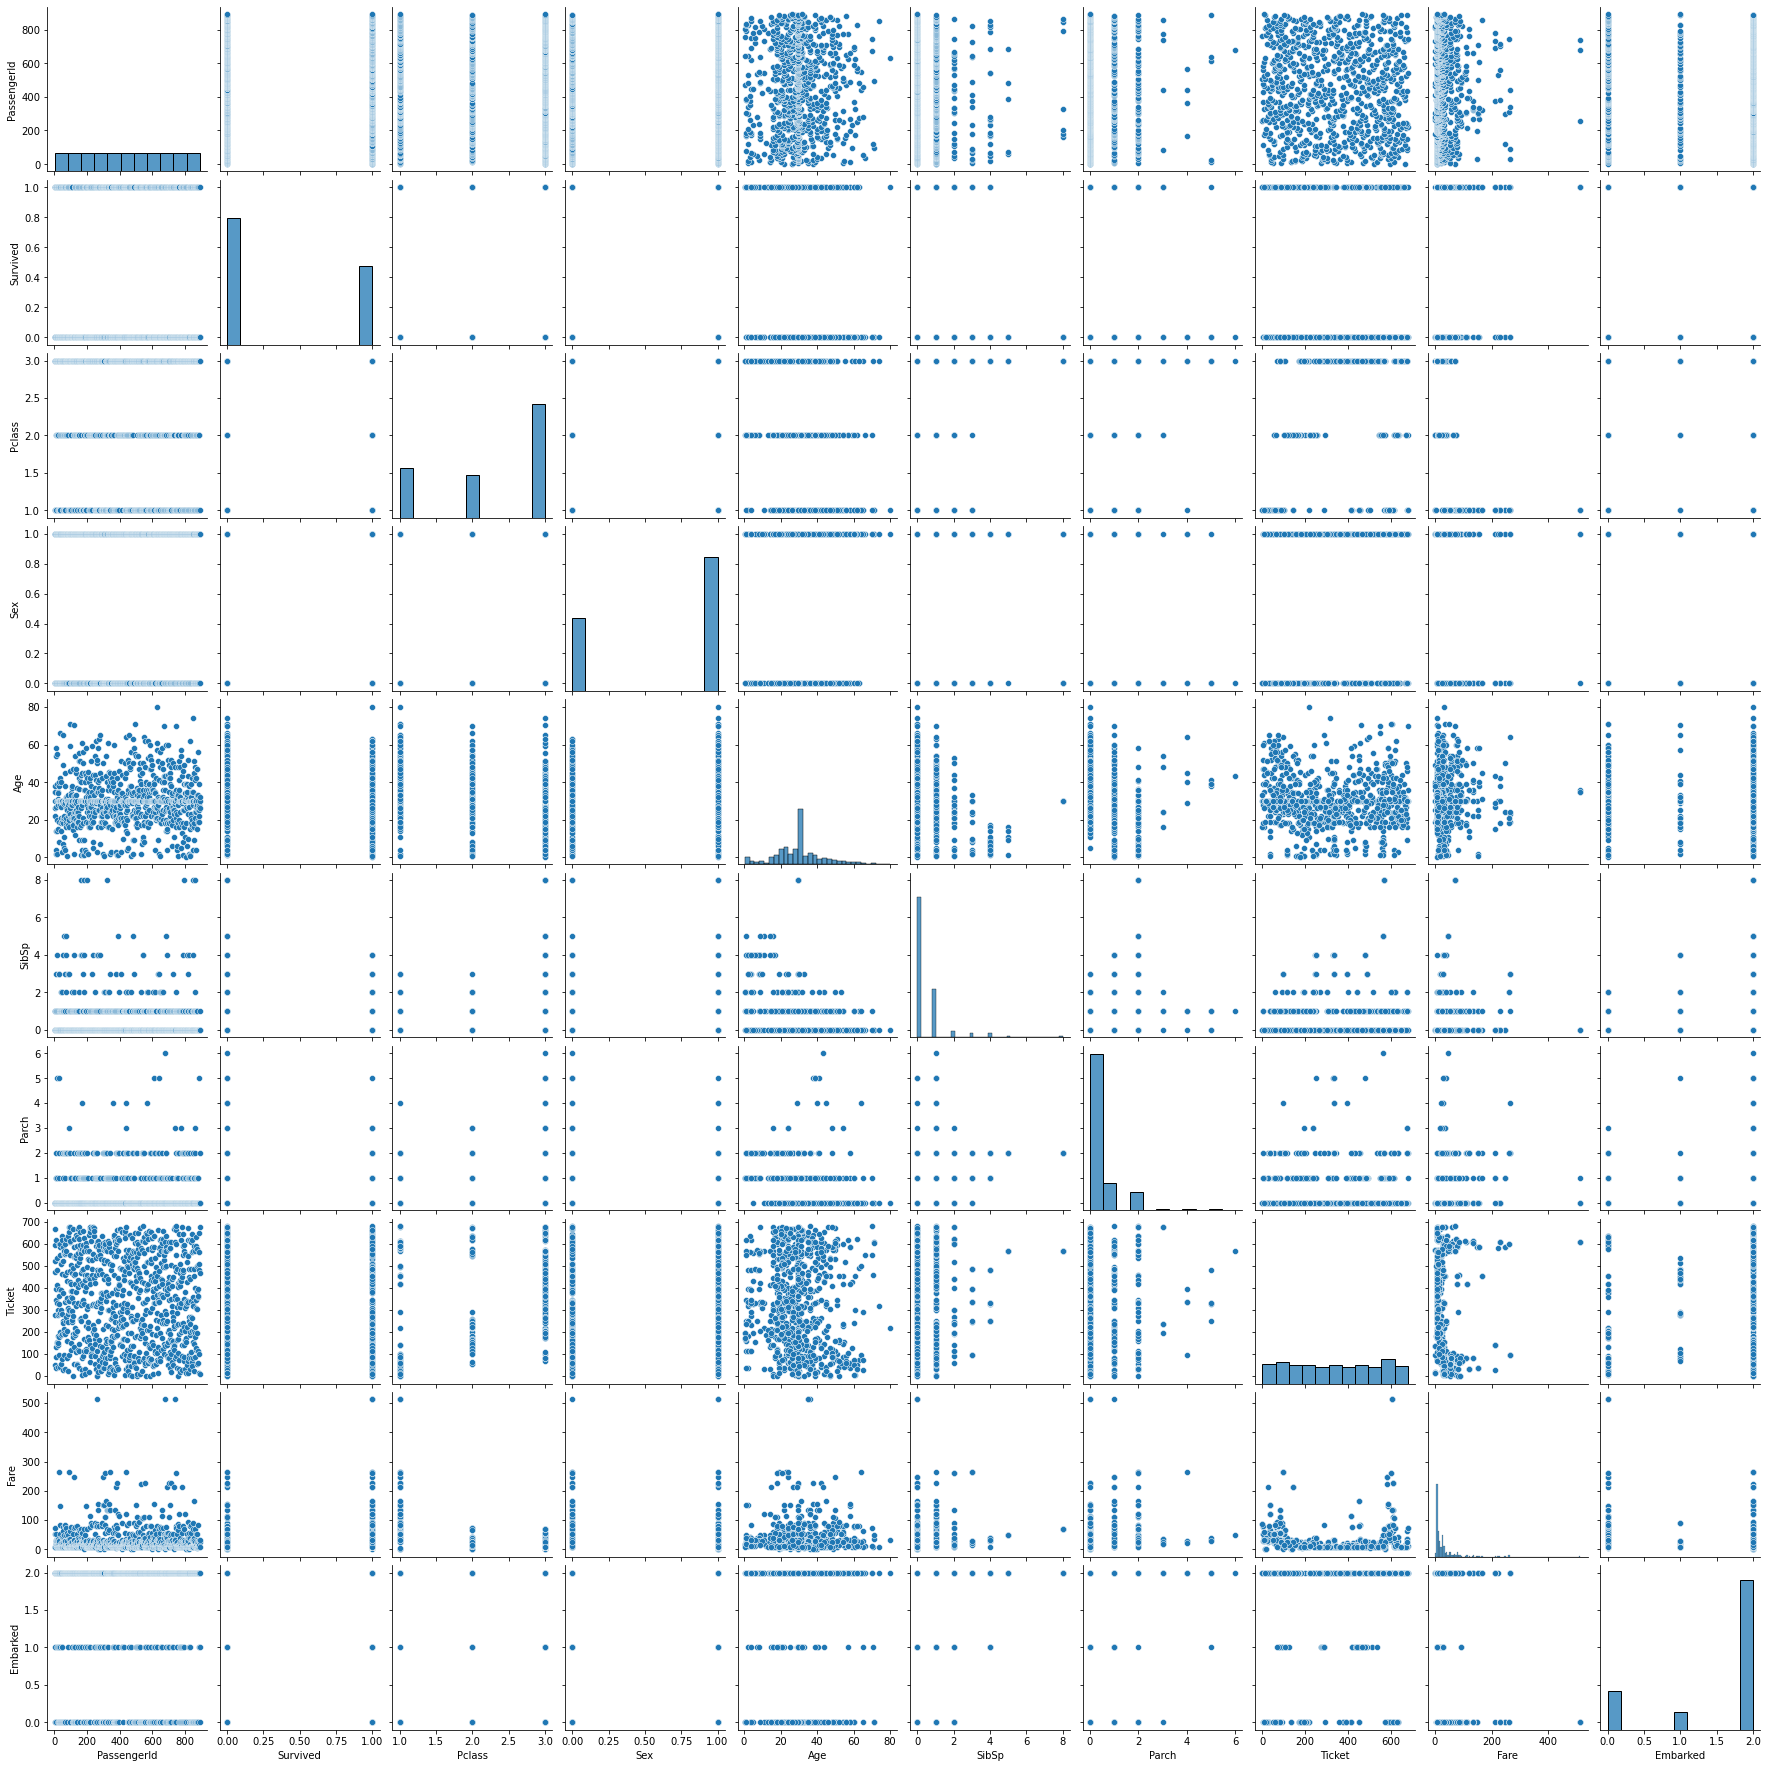

In [57]:
sns.pairplot(df)

In [58]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,1.000000


In [59]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [60]:
from scipy.stats import zscore

In [61]:
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([6, 5, 6, 8, 5, 5, 5, 5, 6, 8, 4, 4, 8, 5, 5, 5, 6, 5, 5, 5, 5, 5,
        8, 5, 5, 5, 8, 8, 5, 8, 6, 8, 8, 5, 6, 6, 8, 5, 4, 8, 5, 5, 8, 6,
        6, 4, 6, 4, 6, 8, 5, 5, 8, 8, 8, 8, 6, 8, 8, 4, 6, 8, 5, 5, 5, 5,
        5, 5, 4, 6, 5, 6], dtype=int64))

In [62]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,2
1,2,1,1,0,38.000000,1,0,596,71.2833,0
2,3,1,3,0,26.000000,0,0,669,7.9250,2
3,4,1,1,0,35.000000,1,0,49,53.1000,2
4,5,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,2
887,888,1,1,0,19.000000,0,0,14,30.0000,2
888,889,0,3,0,29.699118,1,2,675,23.4500,2
889,890,1,1,1,26.000000,0,0,8,30.0000,0


In [63]:
df_new_z.corr()['Survived'].sort_values()

Sex           -0.554888
Pclass        -0.322306
Ticket        -0.159393
Embarked      -0.154994
Age           -0.090926
PassengerId   -0.013852
SibSp          0.094459
Parch          0.201071
Fare           0.330439
Survived       1.000000
Name: Survived, dtype: float64

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
df=df_new_z
df.drop('Age',inplace=True,axis=1)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,1,0,523,7.2500,2
1,2,1,1,0,1,0,596,71.2833,0
2,3,1,3,0,0,0,669,7.9250,2
3,4,1,1,0,1,0,49,53.1000,2
4,5,0,3,1,0,0,472,8.0500,2
5,6,0,3,1,0,0,275,8.4583,1
6,7,0,1,1,0,0,85,51.8625,2
7,8,0,3,1,3,1,395,21.0750,2
8,9,1,3,0,0,2,344,11.1333,2
9,10,1,2,0,1,0,132,30.0708,0


In [66]:
df.drop('PassengerId',inplace=True,axis=1)
df.drop('SibSp',inplace=True,axis=1)

In [67]:
df

,Survived,Pclass,Sex,Parch,Ticket,Fare,Embarked
0,0,3,1,0,523,7.2500,2
1,1,1,0,0,596,71.2833,0
2,1,3,0,0,669,7.9250,2
3,1,1,0,0,49,53.1000,2
4,0,3,1,0,472,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,1,0,101,13.0000,2
887,1,1,0,0,14,30.0000,2
888,0,3,0,2,675,23.4500,2
889,1,1,1,0,8,30.0000,0


Data Modelling

In [69]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=43)

GaussianNB

In [72]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predict_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,predict_gnb))
print(confusion_matrix(y_test,predict_gnb))
print(classification_report(y_test,predict_gnb))

0.850828729281768
[[98 15]
 [12 56]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       113
           1       0.79      0.82      0.81        68

    accuracy                           0.85       181
   macro avg       0.84      0.85      0.84       181
weighted avg       0.85      0.85      0.85       181



Decision Tree Classification

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8066298342541437
[[93 20]
 [15 53]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       113
           1       0.73      0.78      0.75        68

    accuracy                           0.81       181
   macro avg       0.79      0.80      0.80       181
weighted avg       0.81      0.81      0.81       181



In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train,y_train)
kmn.score(x_train,y_train)
pred_kmn=kmn.predict(x_test)
print(accuracy_score(y_test,pred_kmn))
print(confusion_matrix(y_test,pred_kmn))
print(classification_report(y_test,pred_kmn))

0.7292817679558011
[[92 21]
 [28 40]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       113
           1       0.66      0.59      0.62        68

    accuracy                           0.73       181
   macro avg       0.71      0.70      0.70       181
weighted avg       0.72      0.73      0.73       181



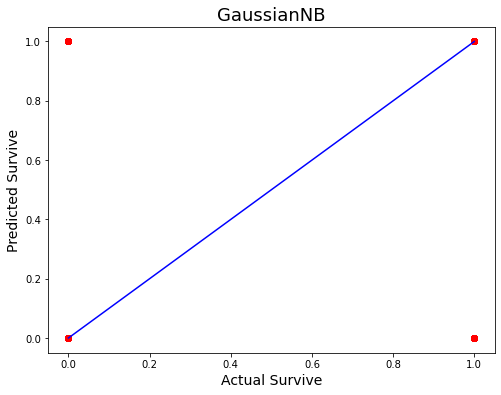

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predict_gnb, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Survive',fontsize=14)
plt.ylabel('Predicted Survive',fontsize=14)
plt.title('GaussianNB',fontsize=18)
plt.show()

Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [81]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.7)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i,"The model perform very well")
        print("At random_state:-",i)
        print("Training accuracy score is ", round(accuracy_score(y_train,pred_train)*100,1))
        print("Training accuracy score is ", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 166 The model perform very well
At random_state:- 166
Training accuracy score is  79.3
Training accuracy score is  79.3 


At random state 326 The model perform very well
At random_state:- 326
Training accuracy score is  79.3
Training accuracy score is  79.3 


At random state 352 The model perform very well
At random_state:- 352
Training accuracy score is  79.3
Training accuracy score is  79.3 


At random state 396 The model perform very well
At random_state:- 396
Training accuracy score is  78.9
Training accuracy score is  78.9 


At random state 475 The model perform very well
At random_state:- 475
Training accuracy score is  78.9
Training accuracy score is  78.9 


At random state 492 The model perform very well
At random_state:- 492
Training accuracy score is  79.3
Training accuracy score is  79.3 


At random state 519 The model perform very well
At random_state:- 519
Training accuracy score is  80.1
Training accuracy score is  80.1 


At random state 630 The mod

In [82]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       361
           1       0.70      0.75      0.73       213

    accuracy                           0.79       574
   macro avg       0.78      0.78      0.78       574
weighted avg       0.79      0.79      0.79       574



Cross validation score for Logistic Regression

In [83]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv: ",j)
    print("Cross validation score is ", lsc*100)
    print("Accuracy score is ", lss*100)
    print("\n")

At cv:  2
Cross validation score is  77.5609756097561
Accuracy score is  79.09407665505228


At cv:  3
Cross validation score is  78.78131600759339
Accuracy score is  79.09407665505228


At cv:  4
Cross validation score is  78.90243902439025
Accuracy score is  79.09407665505228


At cv:  5
Cross validation score is  79.39024390243902
Accuracy score is  79.09407665505228


At cv:  6
Cross validation score is  79.14609274366681
Accuracy score is  79.09407665505228


At cv:  7
Cross validation score is  79.39094803501582
Accuracy score is  79.09407665505228


At cv:  8
Cross validation score is  78.90253188654103
Accuracy score is  79.09407665505228


At cv:  9
Cross validation score is  78.6576949620428
Accuracy score is  79.09407665505228




In [84]:
lsscore_selected = cross_val_score(lr,x,y,cv=6).mean()
print("The cv score is ", lsscore_selected, "\nThe accuracy score is ", lss)

The cv score is  0.7914609274366682 
The accuracy score is  0.7909407665505227


AUC ROC Curve:

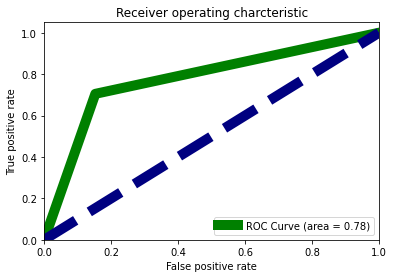

In [85]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'green', lw=10, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charcteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle
filename = 'WineQuality.pkl'
pickle.dump(lr, open(filename,'wb'))